In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [3]:
data = pd.read_csv('bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:

data = data.iloc[:,0:8].replace('unknown', np.nan).dropna()
data.head()

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
5,35,management,married,tertiary,no,231,yes,no
6,28,management,single,tertiary,no,447,yes,yes


**EDA of the Dataset**

In [34]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
dtype: object

In [35]:
data.describe()

,age,balance
count,43193.000000,43193.000000
mean,40.764082,1354.027342
std,10.512640,3042.103625
min,18.000000,-8019.000000
25%,33.000000,71.000000
50%,39.000000,442.000000
75%,48.000000,1412.000000
max,95.000000,102127.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0eb8268b38>]],
      dtype=object)

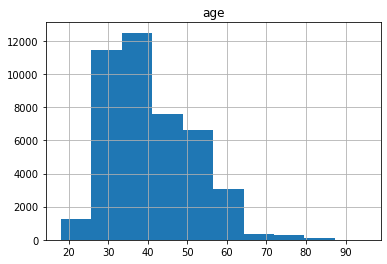

In [36]:
data.hist(column='age')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0eb81cc9b0>]],
      dtype=object)

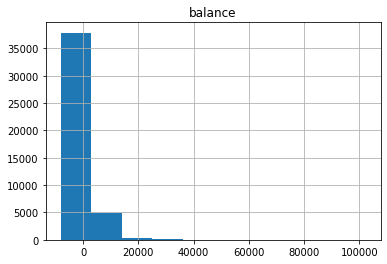

In [37]:
data.hist(column='balance')

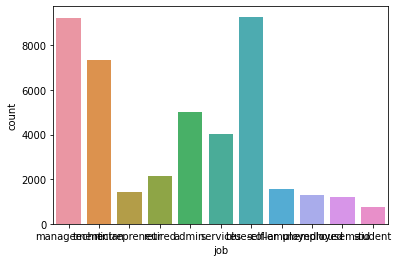

In [38]:
sb.countplot(data = data, x = 'job')
plt.show()

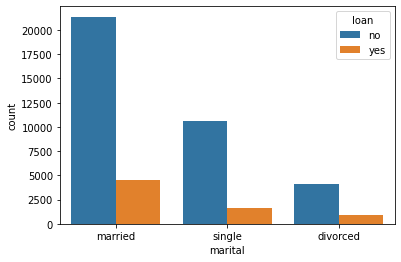

In [39]:
sb.countplot(data = data, x = 'marital',hue='loan')
plt.show()

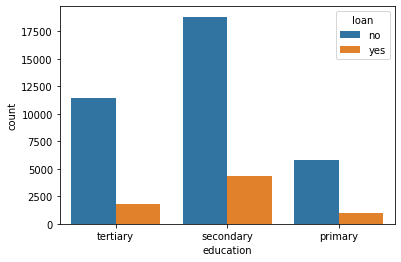

In [40]:
sb.countplot(data=data, x='education',hue='loan')
plt.show()

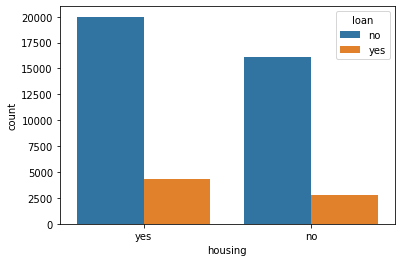

In [41]:
sb.countplot(data=data, x='housing',hue='loan')
plt.show()

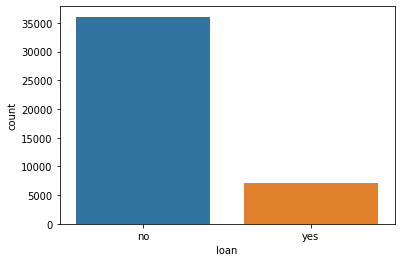

In [42]:
sb.countplot(data=data, x='loan')
plt.show()

**Classification Model Using KNN**

In [5]:
def get_dummy_from_bool(row, column_name):
    ''' Returns 0 if value in column_name is no, returns 1 if value in column_name is yes'''
    return 1 if row[column_name] == 'yes' else 0

In [6]:
def get_correct_values(row, column_name, threshold, data):
    
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = data[data[column_name] <= threshold][column_name].mean()
        return mean

In [7]:
from sklearn.model_selection import train_test_split
def clean_data(data):
    
    
    cleaned_data = data.copy()
    bool_columns = ['default', 'housing', 'loan']
    for bool_col in bool_columns:
        cleaned_data[bool_col + '_bool'] = data.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_data = cleaned_data.drop(columns = bool_columns)
    
    #convert categorical columns to dummies
    cat_columns = ['job', 'marital', 'education']
    
    for col in  cat_columns:
        cleaned_data = pd.concat([cleaned_data.drop(col, axis=1),
                                pd.get_dummies(cleaned_data[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    
    #drop irrelevant columns

    
    X = cleaned_data.iloc[:, :].values
    Y = data.iloc[:, -1].values

    
    return X, Y

In [8]:
X, Y = clean_data(data)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test,  Y_train,  Y_test = train_test_split(X, Y, test_size = 0.20)


In [10]:
X_train.shape

(34554, 19)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.98064174, -0.1576053 , -0.13671517, ..., -0.62866466,
         0.93247075, -0.66725545],
       [-1.21558433,  0.08997007, -0.13671517, ...,  1.59067316,
        -1.0724197 ,  1.49867642],
       [ 1.74454646,  0.15601186, -0.13671517, ..., -0.62866466,
        -1.0724197 ,  1.49867642],
       ...,
       [ 1.07612983, -0.31116059, -0.13671517, ..., -0.62866466,
         0.93247075, -0.66725545],
       [-0.5471677 , -0.43055634,  7.31447724, ..., -0.62866466,
        -1.0724197 ,  1.49867642],
       [-0.92912006,  0.01937367, -0.13671517, ...,  1.59067316,
        -1.0724197 ,  1.49867642]])

In [13]:
X_test=scaler.transform(X_test)
X_test

array([[-0.64265579, -0.46439056, -0.13671517, ..., -0.62866466,
         0.93247075, -0.66725545],
       [ 0.98064174, -0.39704745, -0.13671517, ..., -0.62866466,
         0.93247075, -0.66725545],
       [ 0.21673702, -0.31766717, -0.13671517, ...,  1.59067316,
         0.93247075, -0.66725545],
       ...,
       [-0.16521534, -0.25683065, -0.13671517, ..., -0.62866466,
        -1.0724197 ,  1.49867642],
       [ 1.26710601,  0.19732864, -0.13671517, ...,  1.59067316,
         0.93247075, -0.66725545],
       [-0.92912006, -0.42665239, -0.13671517, ...,  1.59067316,
         0.93247075, -0.66725545]])

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix


In [19]:
k = np.sqrt(X_train.shape[0])
knn=KNeighborsClassifier(n_neighbors=int(k))

In [20]:
def KNN(X_train, Y_train):
    knn.fit(X_train,Y_train)

In [21]:
#Calling the function
KNN(X_train, Y_train)

In [29]:
#tester function. returns -> predicted values, accuracy and confusion matrix
def tester(X_test):
    y_pred=knn.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    conf_mat = confusion_matrix(Y_test,y_pred)

    return y_pred, accuracy, conf_mat

In [30]:
Y_pred, accuracy, confusion = tester(X_test)

In [31]:
Y_pred.shape

(8639,)

In [32]:
accuracy

0.989234865146429

In [33]:
confusion

array([[7209,    0],
       [  93, 1337]])